# Polytech SI3 - Données numériques
Diane Lingrand

Diane.Lingrand@univ-cotedazur.fr

2022-2023

## Cours 1 - Introduction

## 1. Librairies numpy et matplotlib

In [103]:
#seulement si vous n'avez pas déjà installé ces librairies
%pip install numpy
%pip install matplotlib

/nix/store/ixrxzvapbp7ggm8y7frfdclzxwby1wcm-python3-3.10.9-env/bin/python3.10: No module named pip
Note: you may need to restart the kernel to use updated packages.
/nix/store/ixrxzvapbp7ggm8y7frfdclzxwby1wcm-python3-3.10.9-env/bin/python3.10: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [104]:
#chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### 1.2 tracés de fonctions mathématiques usuelles

#### exponentielle

Pour le premier dessin, tracez la courbe qui représente la fonction exponentielle pour les valeurs entières entre 0 et 500.

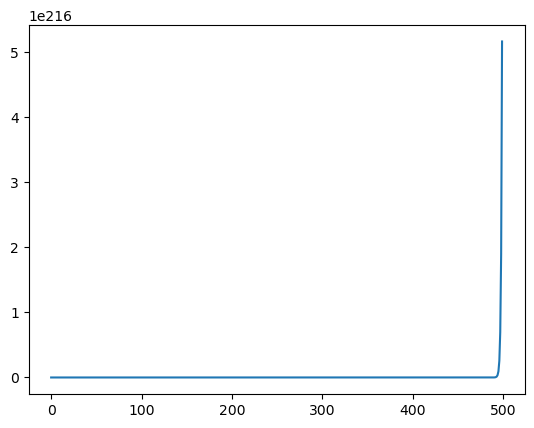

In [105]:
# dessin 1
x = np.arange(0,500)
y = np.exp(x)
plt.plot(x,y)

Peut-on aller vers de plus grandes valeurs? Quelle est la limite? Pourquoi?

Ajoutez des légendes sur les axes de la figure.

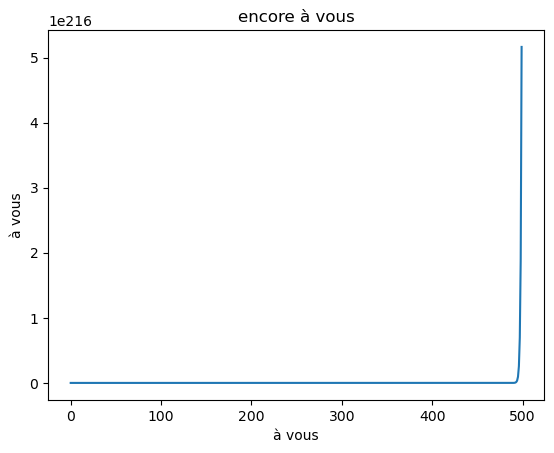

In [106]:
# dessin 1
x = np.arange(0,500)
y = np.exp(x)
plt.xlabel('à vous')
plt.ylabel('à vous')
plt.title('encore à vous')
plt.plot(x,y)

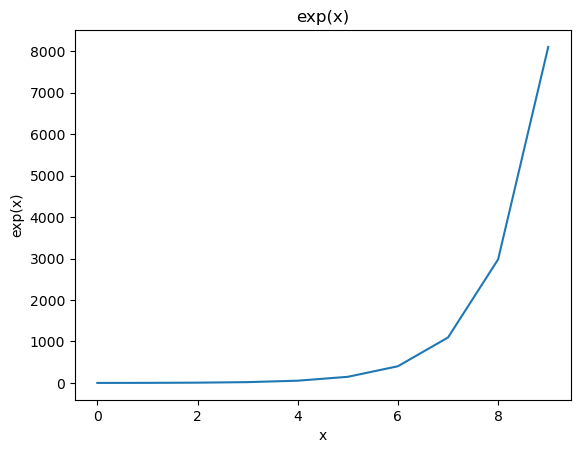

In [107]:
# dessin 2
# tracez la même courbe mais pour des valeurs entières entre 0 et 10
# dessin 1
x = np.arange(0,10)
y = np.exp(x)
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('exp(x)')
plt.plot(x,y)

Les deux graphiques précédents n'ont pas la même allure. Pourquoi?
Pour le dessin numéro 2, remplacer les valeurs entières de x par des valeurs décimales de telle sorte qu'il y ait une centaine de valeurs entre 0 et 10.

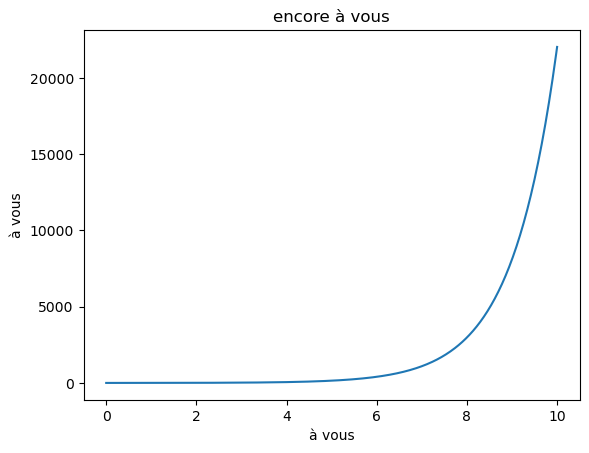

In [108]:
x = np.linspace(0, 10, 500)
y = np.exp(x)
plt.xlabel('à vous')
plt.ylabel('à vous')
plt.title('encore à vous')
plt.plot(x,y)
                

Pour chaque valeure entière et impaire de x, tracez un petit segment qui passe par ce point (xi,yi) et de pente exp(xi). A quoi cela correspond?

Cela correspond à la dérivée de exp(x) en x=xi.

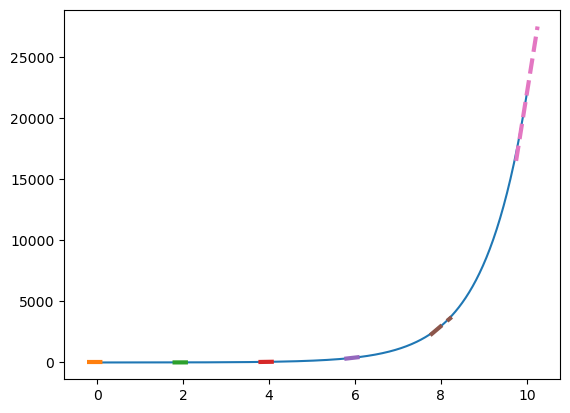

In [109]:
# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1, slope):
    return slope*(x - x1) + y1

def draw_tangent(x1, y1, slope):
    xrange = np.linspace(x1 - 1/4, x1 + 1/4, 100)
    plt.plot(xrange, line(xrange, x1, y1, slope), label=f'tangent at x={x1}', linewidth=3, linestyle='--')

x = np.linspace(0, 10, 500)
plt.plot(x, np.exp(x), label='e(x)')

for xi in range(0, 11, 2):
    draw_tangent(xi, np.exp(xi), np.exp(xi))

#### logarithme

Explorez de la même façon la fonction logarithme. Jouez avec les valeurs de x. Est-ce un logarithme népérien ou en base 10?

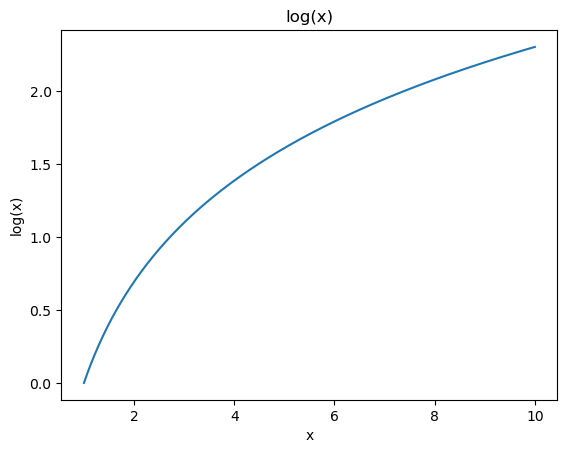

In [110]:
x = np.linspace(1, 10, 500)
y = np.log(x)
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('log(x)')
plt.plot(x,y)

Ajoutez les segments de pente 1/xi:

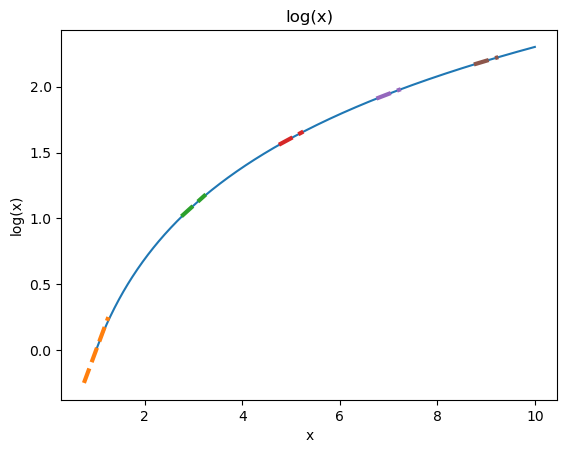

In [111]:
x = np.linspace(1, 10, 500)
y = np.log(x)
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('log(x)')
plt.plot(x,y)


for xi in range(1, 11, 2):
    draw_tangent(xi, np.log(xi), 1/xi)

#### combiner log et exp

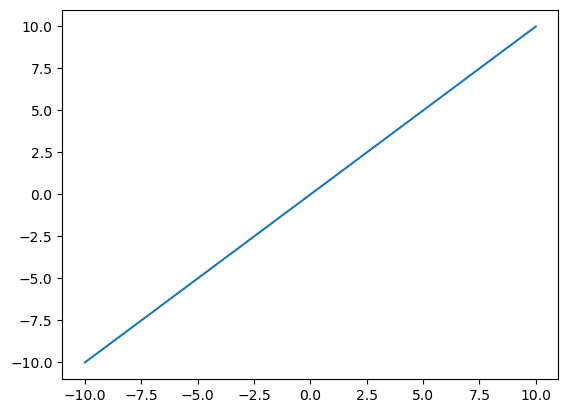

In [112]:
# tracer la fonction f(x) = log(exp(x))
x = np.linspace(-10, 10, 100)
y = np.log(np.exp(x))
plt.plot(x, y)

#### sinusoïde

Mêmes questions.

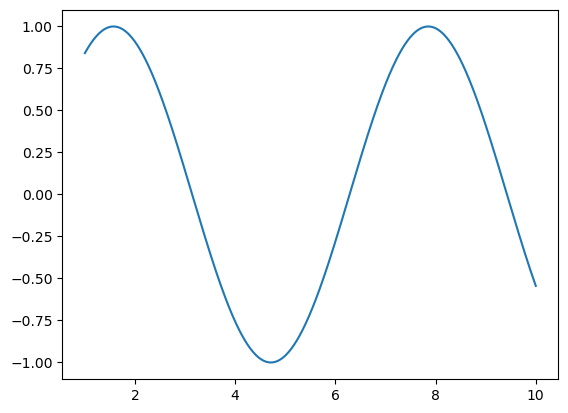

In [113]:
x = np.linspace(1, 10, 500)
y = np.sin(x)
plt.plot(x,y)

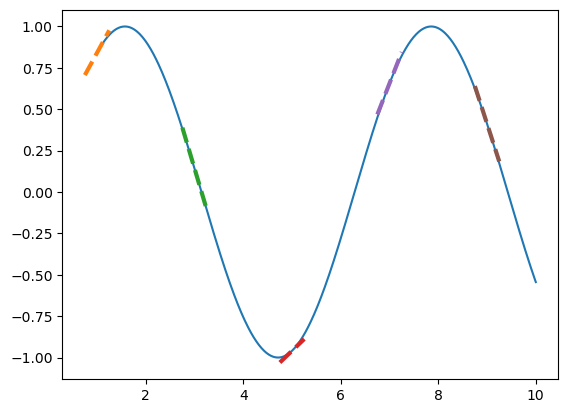

In [114]:
x = np.linspace(1, 10, 500)
y = np.sin(x)
plt.plot(x,y)

for xi in range(1, 10, 2):
    draw_tangent(xi, np.sin(xi), np.cos(xi))

### 1.2 Dessiner des points

Dessinez 200 points aléatoires (loi uniforme: np.random.uniform). Testez différentes [couleurs](https://matplotlib.org/stable/gallery/color/named_colors.html) et différents [markers](https://matplotlib.org/stable/api/markers_api.html).

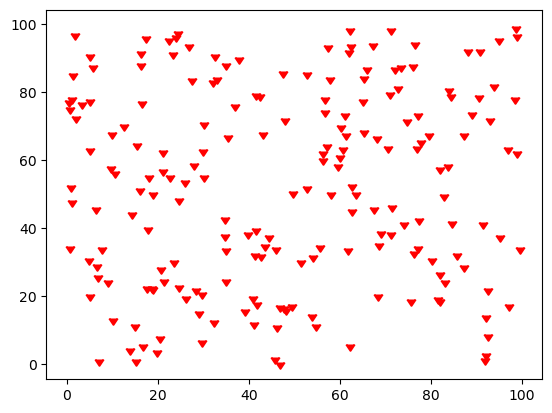

In [115]:
x = np.random.uniform(0, 100, 200)
y = np.random.uniform(0, 100, 200)
plt.scatter(x,y, color='red', marker=mpl.markers.CARETDOWNBASE)

Faites de même mais avec une loi gaussienne (np.random.normal).

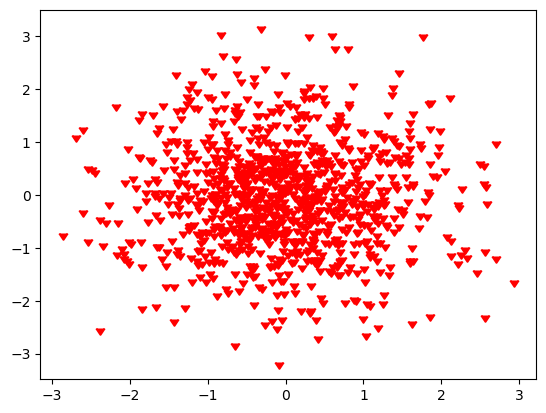

In [116]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
plt.scatter(x,y, color='red', marker=mpl.markers.CARETDOWNBASE)

## 2. Chronogrammes
### 2.1 Sons générés

In [117]:
%pip install librosa

/nix/store/ixrxzvapbp7ggm8y7frfdclzxwby1wcm-python3-3.10.9-env/bin/python3.10: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [118]:
#chargement des librairies
import librosa
import librosa.display
import IPython.display as ipd

Pour un premier son, générez un 'la' de référence 440Hz.

In [119]:
#un petit test de son
n=6400# nombre d'échantillons
te=1/8000.0 # période d'échantillonnage
fe=8000 # fréquence d'échantillonnage
t = np.linspace(0, n*te, n,endpoint=False)
# accordons-nous sur un la 440 Hz
s= np.cos(2*np.pi*440*t)

Combien de temps dure ce son?

In [120]:
# écoutons 
ipd.Audio(s,rate=fe,autoplay=True)

Testez d'autres fréquences et d'autres combinaison de sinusoïdes. Par exemple la somme d'un son pur à 440 Hz et d'un autre à 200 Hz de puissance double.

In [121]:
s = 0.25*np.cos(2*np.pi*440*t+0.5) + 0.5*np.cos(2*np.pi*200*t)

Comment faire durer le son plus longtemps? Par exemple 4 secondes.

Modifiez la fréquence d'échantillonage mais juste pour l'écoute. Qu'observez-vous?

In [122]:
ipd.Audio(s,rate=0.8*fe,autoplay=True)

In [123]:
ipd.Audio(s,rate=1.2*fe,autoplay=True)

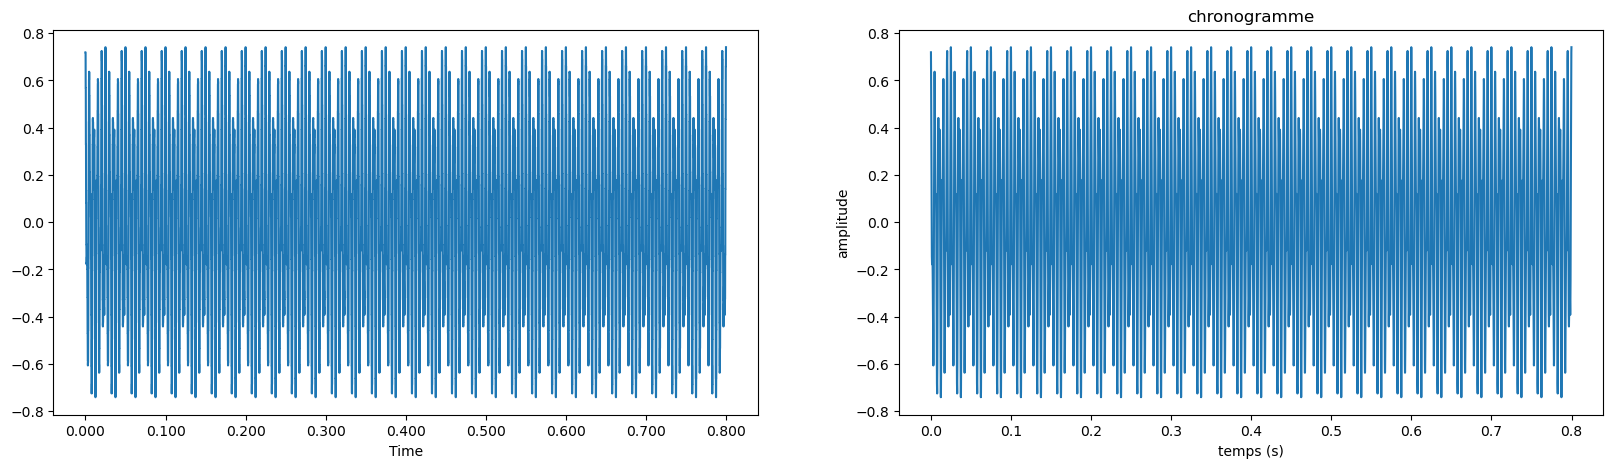

In [124]:
# regardons
# 2 types de visualisation: par librosa.display.waveplot et par plt.plot
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20, 5))
librosa.display.waveshow(s,sr=fe, ax=ax1)
ax2.set_xlabel('temps (s)')
ax2.set_ylabel('amplitude')
ax2.set_title("chronogramme")
ax2.plot(t,s)
plt.title("chronogramme")
plt.show()

Voyez-vous les belles sinusoïdes? Pourquoi? Comment modifier la visualisation? 

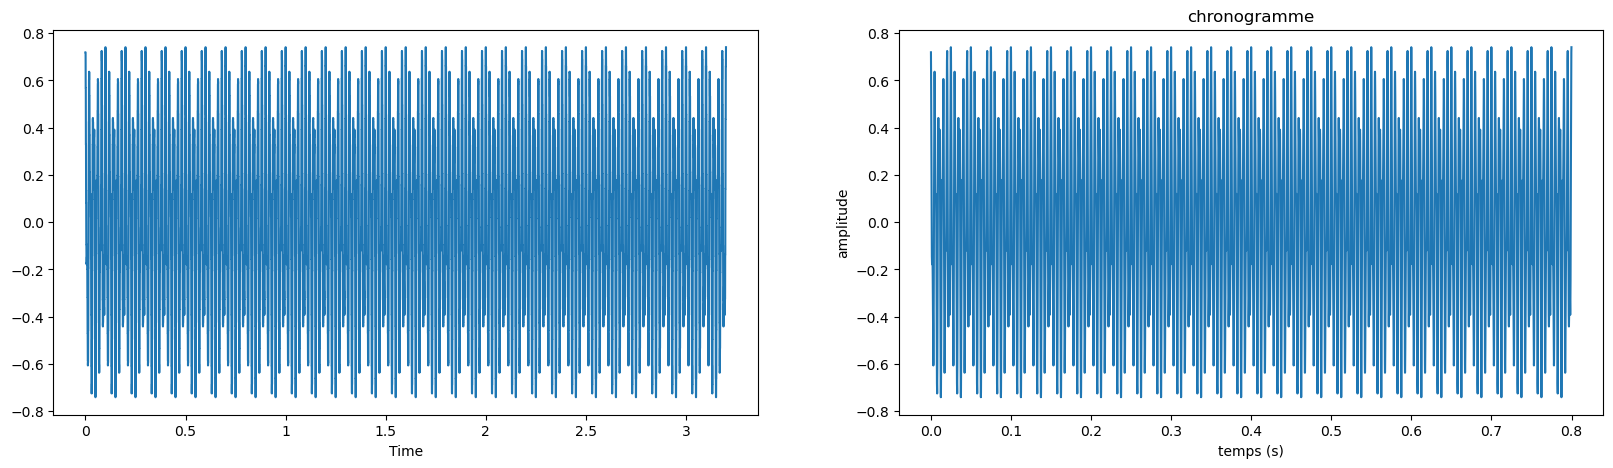

In [128]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20, 5))
librosa.display.waveshow(s,sr=4, ax=ax1)
ax2.set_xlabel('temps (s)')
ax2.set_ylabel('amplitude')
ax2.set_title("chronogramme")
ax2.plot(t,s)
plt.title("chronogramme")
plt.show()

### 2.2 Sons réels

Il est possible de charger des sons que vous possédez sur votre disque dur ou bien en provenance de la librairie librosa.

In [98]:
#son issu de librosa
y2, sr2 = librosa.load(librosa.ex('choice'), duration=10)

## 3. Quantification et échantillonnage

In [99]:
#prendre 1 échantillon sur 2
s = y2[::2]
# écouter et dessiner
ipd.Audio(s,rate=sr2/2,autoplay=True)
#essayer d'autres sous-echantillonnage (1 sur 4, 1 sur 8 ....)
#s = y2[::4]
ipd.Audio(s,rate=sr2/4,autoplay=True)

In [100]:
#quantifier les valeurs sur un nombre de bits défini: q 
q=4
s2 = np.round(s*2**(q-1))/2**(q-1)
ipd.Audio(s2,rate=sr2/2,autoplay=True)

In [101]:
# si vous avez encore des oreilles en état, vous pouvez également jouer sur la quantification
## sur b bits
b = 4 # à vous de modifier avec cette valeur
Q = 2**(1-b)
s = Q*np.floor(s/Q)

ipd.Audio(s,rate=sr2/2,autoplay=True)